# 4.8 配置图例

In [5]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [6]:
%matplotlib inline 
import numpy as np

In [7]:
x = np.linspace(0, 10, 1000)

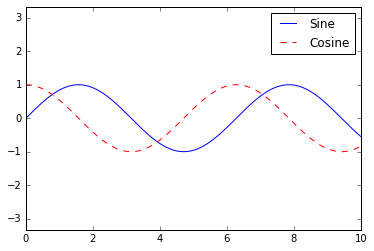

In [8]:
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend()

设置图例的位置，并取消外边框

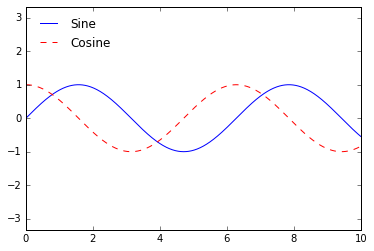

In [9]:
ax.legend(loc='upper left', frameon=False)
fig

用ncol参数设置图例的标签列数

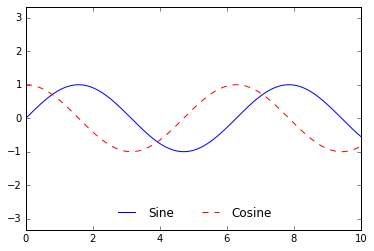

In [10]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

为图例定义圆角边框，增加阴影、改变外边框透明度，改变文字间距

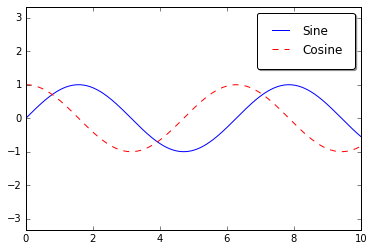

In [11]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

## 4.8.1 选择图例显示的元素

**方法一：将需要显示的线条传入plt.legend()。**

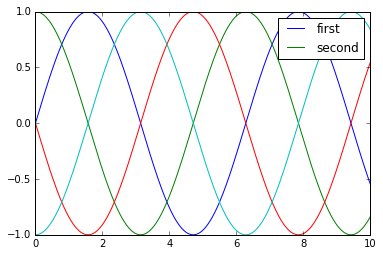

In [12]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

#lines变量是一组plt.Line2D实例
plt.legend(lines[:2], ['first', 'second'])

In [13]:
lines

**方法二：只为需要在图例中显示的线条设置标签。**

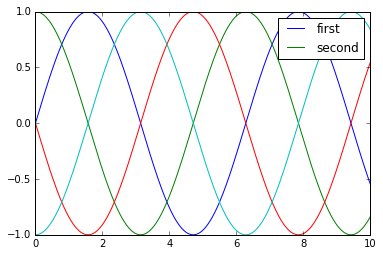

In [14]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True)

y[:, 2:]，这里看似好像多了一个冒号，意思是把后面的两条曲线不做标注，全画了。

## 4.8.2 在图例中显示不同尺寸的点

In [15]:
import pandas as pd

In [16]:
cities = pd.read_csv('./data/california_cities.csv')

In [17]:
# 提取感兴趣的数据
lat, lon = cities['latd'], cities['longd']

In [18]:
population, area = cities['population_total'], cities['area_total_km2']

Text(0.5,1,'California Cities: Area and Population')

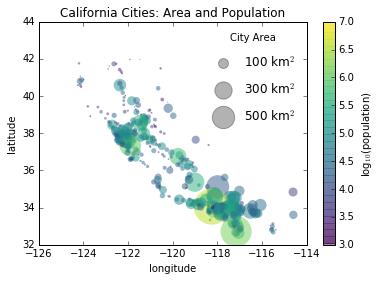

In [19]:
# 用不同的尺寸和颜色的散点图表示数据，但是不带标签
plt.scatter(lon, lat, label=None, c=np.log10(population), cmap='viridis', s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# 下面创建一个图例
# 画一些带标签和尺寸的空列表
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area, label=str(area) + ' km$^2$')

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')
plt.title('California Cities: Area and Population')    

## 4.8.3 同时显示多个图例

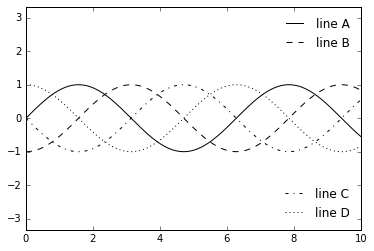

In [20]:
fig, ax = plt.subplots()
lines = []
styles = ['-', '--', '-.', ':']

x = np.linspace(0, 10, 1000)
for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2), styles[i], color='black')

ax.axis('equal')

# 设置第一个图例要显示的线条和标签
ax.legend(lines[:2], ['line A', 'line B'], loc='upper right', frameon=False)

# 创建第二个图例，通过add_artist方法添加到提上
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'], loc='lower right', frameon=False)
ax.add_artist(leg)

# 4.9 配置颜色条

In [21]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [22]:
%matplotlib inline
import numpy as np

In [23]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

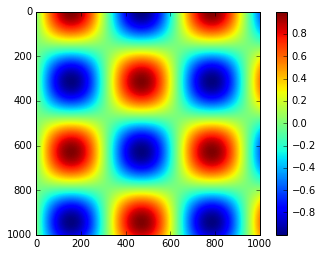

In [24]:
plt.imshow(I)
plt.colorbar()

## 4.9.1 配置颜色条

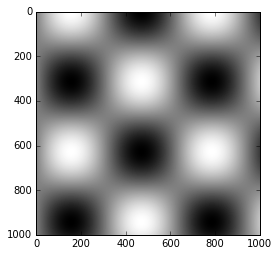

In [25]:
plt.imshow(I, cmap='gray')

1. 选择配色方案

顺序配色方案；互逆配色方案；定性配色方案

通过把jet转换为黑白的灰度图看看具体的颜色。

In [26]:
from matplotlib.colors import LinearSegmentedColormap

In [27]:
cmap = 'jet'
cmap = plt.cm.get_cmap(cmap)

In [28]:
np.arange(cmap.N)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [29]:
colors = cmap(np.arange(cmap.N))
RGB_weight = [0.299, 0.587, 0.114]
cmap(np.arange(cmap.N))

array([[0.        , 0.        , 0.5       , 1.        ],
       [0.        , 0.        , 0.51782531, 1.        ],
       [0.        , 0.        , 0.53565062, 1.        ],
       ...,
       [0.53565062, 0.        , 0.        , 1.        ],
       [0.51782531, 0.        , 0.        , 1.        ],
       [0.5       , 0.        , 0.        , 1.        ]])

In [30]:
np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))

array([0.16881943, 0.17483795, 0.18085647, 0.18687498, 0.1928935 ,
       0.19891202, 0.20493054, 0.21094906, 0.21696757, 0.22298609,
       0.22900461, 0.23502313, 0.24104165, 0.24706016, 0.25307868,
       0.2590972 , 0.26511572, 0.27113424, 0.27715275, 0.28317127,
       0.28918979, 0.29520831, 0.30122683, 0.30724534, 0.31326386,
       0.31928238, 0.3253009 , 0.33131942, 0.33733793, 0.33763886,
       0.33763886, 0.33763886, 0.3376422 , 0.33790946, 0.33860334,
       0.33972123, 0.34125897, 0.3432109 , 0.34557001, 0.34832804,
       0.35147558, 0.35500228, 0.35889695, 0.36314777, 0.36774238,
       0.37266807, 0.37791188, 0.38346077, 0.3893017 , 0.39542172,
       0.40180808, 0.40844828, 0.41533016, 0.4224419 , 0.42977209,
       0.43730974, 0.44504432, 0.45296574, 0.46106436, 0.46933101,
       0.47775698, 0.48633397, 0.49505415, 0.50391007, 0.51289471,
       0.52200142, 0.53122392, 0.54055629, 0.54999293, 0.55952856,
       0.56915822, 0.57887721, 0.5886811 , 0.59856572, 0.60852

In [31]:
luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
colors[:, :3] = luminance[:, np.newaxis]

In [32]:
colors

array([[0.16881943, 0.16881943, 0.16881943, 1.        ],
       [0.17483795, 0.17483795, 0.17483795, 1.        ],
       [0.18085647, 0.18085647, 0.18085647, 1.        ],
       ...,
       [0.29289854, 0.29289854, 0.29289854, 1.        ],
       [0.2831515 , 0.2831515 , 0.2831515 , 1.        ],
       [0.27340446, 0.27340446, 0.27340446, 1.        ]])

In [33]:
def grayscale_cmap(cmap):
    """为配色方案显示灰度图"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # 将RGBA色转换为不同亮度的灰度值
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)

In [34]:
def view_colormap(cmap):
    """用等价的灰度图表示配色方案"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    fig, ax = plt.subplots(2, figsize=(6, 2), subplot_kw=dict(xticks=[], yticks=[]))
    
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

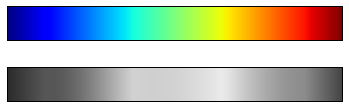

In [35]:
view_colormap('jet')

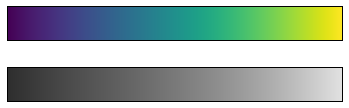

In [36]:
view_colormap('viridis')

彩虹效果推荐配色方案

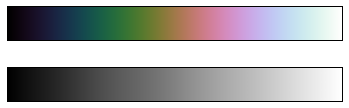

In [37]:
view_colormap('cubehelix')

用红色、蓝色表示的正反两种信息在灰度图上看不出差别！

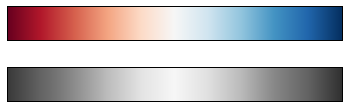

In [38]:
view_colormap('RdBu')

2. 颜色条刻度的限制与扩展功能的设置

In [39]:
# 为图形像素设置1%的噪点
speckles = (np.random.random(I.shape) < 0.01)

In [40]:
speckles

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [41]:
I

array([[ 0.        ,  0.01000984,  0.02001868, ..., -0.52711499,
        -0.53559488, -0.54402111],
       [ 0.        ,  0.01000934,  0.02001768, ..., -0.52708858,
        -0.53556805, -0.54399386],
       [ 0.        ,  0.01000784,  0.02001467, ..., -0.52700936,
        -0.53548755, -0.54391209],
       ...,
       [-0.        , -0.0085063 , -0.01701176, ...,  0.44793914,
         0.4551453 ,  0.46230586],
       [-0.        , -0.00845306, -0.01690528, ...,  0.44513546,
         0.45229652,  0.45941226],
       [-0.        , -0.00839897, -0.01679711, ...,  0.44228718,
         0.44940242,  0.45647263]])

In [42]:
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

In [43]:
I

array([[ 0.        ,  0.01000984,  0.02001868, ..., -0.52711499,
        -0.53559488, -0.54402111],
       [ 0.        ,  0.01000934,  0.02001768, ..., -0.52708858,
        -0.53556805, -0.54399386],
       [ 0.        ,  0.01000784,  0.02001467, ..., -0.52700936,
        -0.53548755, -0.54391209],
       ...,
       [-0.        , -0.0085063 , -0.01701176, ...,  0.44793914,
         0.4551453 ,  0.46230586],
       [-0.        , -0.00845306, -0.01690528, ...,  0.44513546,
         0.45229652,  0.45941226],
       [-0.        , -0.00839897, -0.01679711, ...,  0.44228718,
         0.44940242,  0.45647263]])

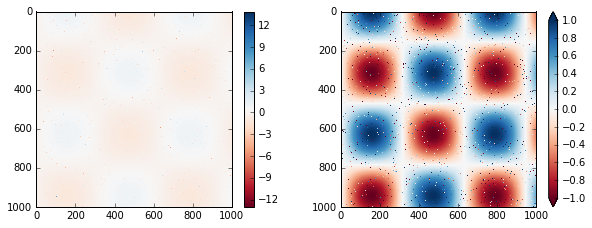

In [44]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1)

3. 离散型颜色条

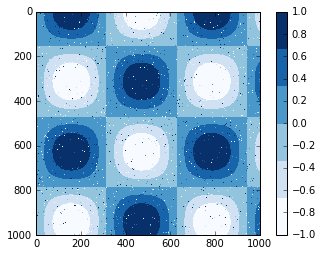

In [45]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1)

## 4.9.2 案例：手写数字

In [46]:
# 加载数字0~5的图形，对其进行可视化
from sklearn.datasets import load_digits

In [47]:
digits = load_digits(n_class=6)

In [48]:
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

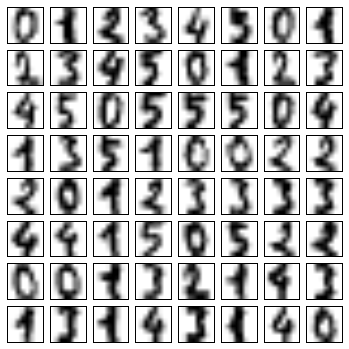

In [49]:
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [50]:
# 用IsoMap方法将数字投影到二维空间
from sklearn.manifold import Isomap

In [51]:
iso = Isomap(n_components=2)

In [52]:
projection = iso.fit_transform(digits.data)

In [53]:
projection

array([[ 151.52041613,   55.39201656],
       [ -97.77177886,   58.0822836 ],
       [-112.70662015,  -45.22557972],
       ...,
       [   8.8746121 ,  111.16000848],
       [  12.29531467,   95.65099338],
       [ 106.8409937 ,   83.03555368]])

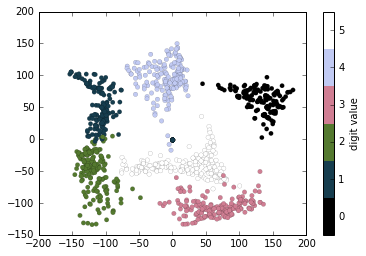

In [54]:
# 画图
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1, c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

# 4.10 多子图

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## 4.10.1 plt.axes：手动创建子图

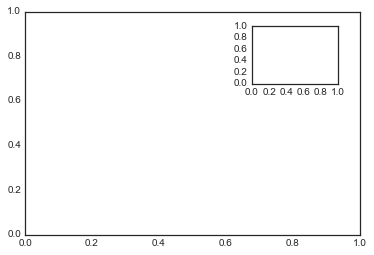

In [56]:
# 默认坐标轴
ax1 = plt.axes()
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

(0.0, 49.0, -0.9993147322454036, 1.0)

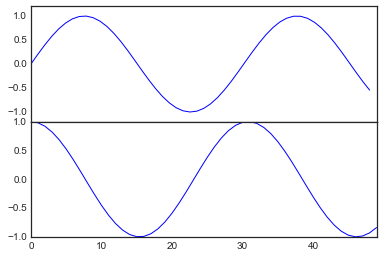

In [57]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))
plt.axis('tight')

## 4.10.2 plt.subplot：简易网格子图

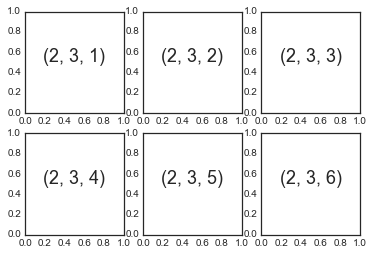

In [58]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

调整子图之间的间隔

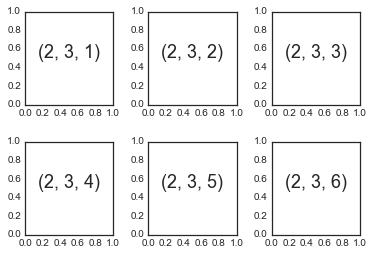

In [59]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

数值以子图的尺寸为单位

## 4.10.3 plt.subplots：用一行代码创建网络

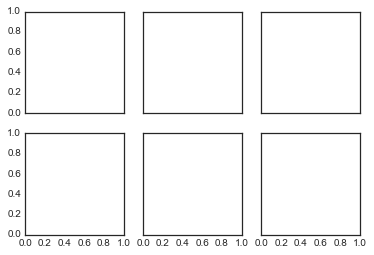

In [60]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

通过标准的数组取值方式获取想要的坐标轴

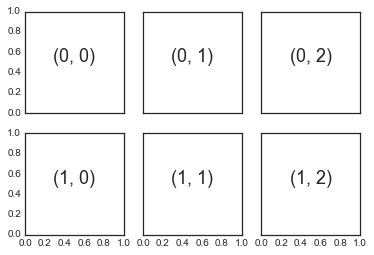

In [61]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18, ha='center')

与plt.subplot()相比，plt.subplots()与Python索引从0开始的习惯保持一致。

## 4.10.4 plt.GridSpec：实现更复杂的排列方式

In [62]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

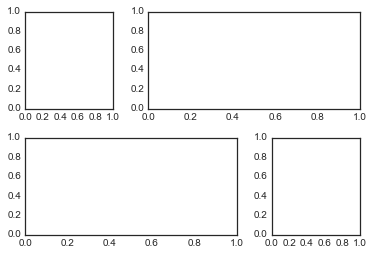

In [63]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2])

创建多轴频次直方图

In [64]:
# 创建一些正态分布数据
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

In [65]:
x

array([-0.8594375 ,  0.92510825,  0.19207565, ...,  1.5322145 ,
        0.5643678 , -1.15017152])

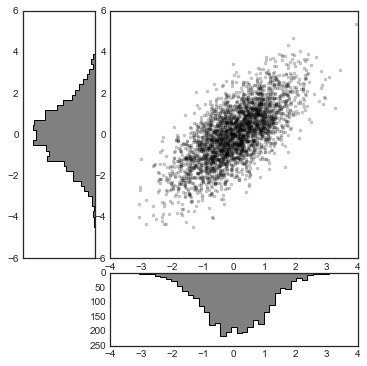

In [66]:
# 设置坐标轴和网格配置方式
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:])

# 柱坐标轴画散点图
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# 次坐标轴画频次直方图
x_hist.hist(x, 40, histtype='stepfilled', orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled', orientation='horizontal', color='gray')
y_hist.invert_xaxis()

# 4.11 文字与注释

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

## 4.11.1 案例：节假日对美国出生率的影响

In [68]:
births = pd.read_csv('./data/births.csv')

In [69]:
quartiles = np.percentile(births['births'], [25, 50, 75])

In [70]:
quartiles

array([4358. , 4814. , 5289.5])

In [71]:
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])

In [72]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5* @sig)')

In [73]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [74]:
births['day'] = births['day'].astype(int)

In [75]:
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [76]:
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')

In [77]:
births.head()

,year,month,day,gender,births
1969-01-01,1969,1,1,F,4046
1969-01-01,1969,1,1,M,4440
1969-01-02,1969,1,2,F,4454
1969-01-02,1969,1,2,M,4548
1969-01-03,1969,1,3,F,4548


In [78]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])

In [79]:
births_by_date

births
1  1   4009.225
   2   4247.400
   3   4500.900
   4   4571.350
   5   4603.625
   6   4668.150
   7   4706.925
   8   4629.650
   9   4537.775
   10  4591.700
   11  4675.150
   12  4700.800
   13  4730.050
   14  4816.200
   15  4733.650
   16  4665.025
   17  4654.650
   18  4707.325
   19  4731.525
   20  4767.525
   21  4790.250
   22  4742.800
   23  4666.750
   24  4653.200
   25  4698.000
   26  4715.900
   27  4747.025
   28  4771.800
   29  4702.300
   30  4644.225
...         ...
12 2   4830.300
   3   4758.500
   4   4718.725
   5   4734.675
   6   4683.050
   7   4704.325
   8   4803.800
   9   4793.825
   10  4785.325
   11  4738.500
   12  4791.300
   13  4676.675
   14  4792.100
   15  4920.800
   16  4968.100
   17  4951.600
   18  4936.375
   19  4962.925
   20  4877.025
   21  4816.100
   22  4661.925
   23  4466.675
   24  4126.250
   25  3844.450
   26  4383.525
   27  4850.150
   28  5044.200
   29  5120.150
   30  5172.350
   31  4859.200

[366 rows x 1 columns]

In [80]:
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]

In [81]:
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


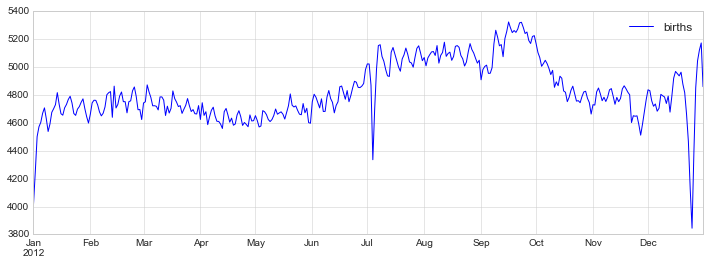

In [82]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

添加注释

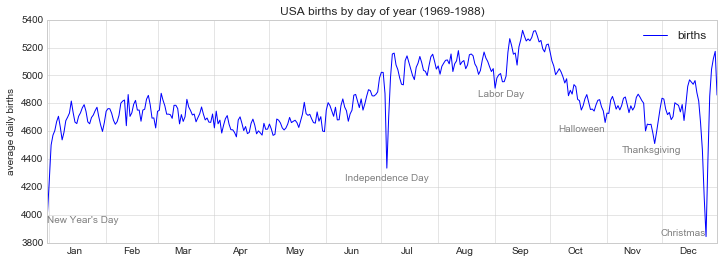

In [83]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# 在图上增加文字标签
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas", ha='right', **style)

# 设置坐标轴标题
ax.set(title='USA births by day of year (1969-1988)', ylabel='average daily births')

# 设置x轴刻度值，让月份居中显示
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))

## 4.11.2 坐标变换与文字位置

用三种变换的方式将文字画在不同的位置

Text(0.2,0.2,'. Figure: (0.2, 0.2)')

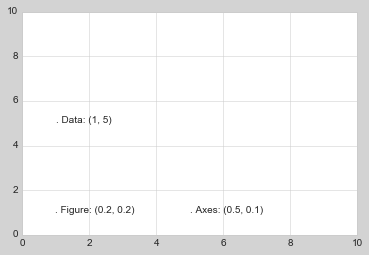

In [84]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# 虽然transform=ax.transData是默认值，但韩式设置一下
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure)

如果改变坐标轴上下限，那么只有transData坐标会受影响，其他坐标系都不变

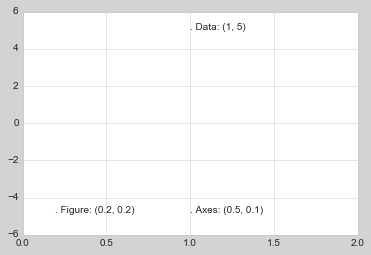

In [85]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

## 4.11.3 箭头与注释

推荐使用plt.annotate(), 而不是plt.arrow()

In [86]:
%matplotlib inline

Text(2,-6,'local minimum')

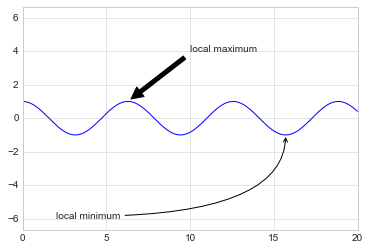

In [87]:
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4), arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6), arrowprops=dict(arrowstyle="->", connectionstyle="angle3, angleA=0, angleB=-90"))

参考链接：[Matplotlib中annotate详解](https://blog.csdn.net/qq_30638831/article/details/79938967)

(3600, 5400)

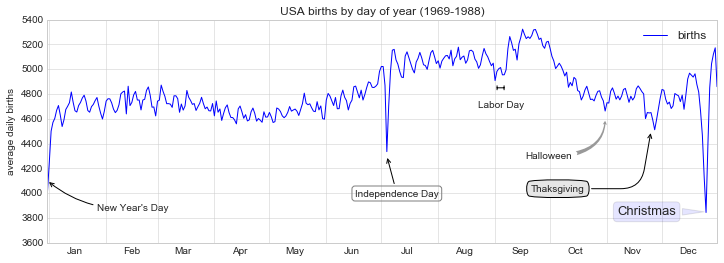

In [109]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# 在图上增加箭头标签
ax.annotate("New Year's Day", xy=('2012-1-1', 4100), xycoords='data', xytext=(50, -30), textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4300), xycoords='data', bbox=dict(boxstyle="round", fc="none", ec="gray"), xytext=(10, -40), textcoords='offset points', ha='center', arrowprops=dict(arrowstyle="->"))

ax.annotate("Labor Day", xy=('2012-9-4', 4850), xycoords='data', ha='center', xytext=(0, -20), textcoords='offset points')

ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850), xycoords='data', textcoords='data', arrowprops={'arrowstyle': '|-|, widthA=0.2, widthB=0.2'})

ax.annotate('Halloween', xy=('2012-10-31', 4600), xycoords='data', xytext=(-80, -40), textcoords='offset points', arrowprops=dict(arrowstyle="fancy", fc="0.6", ec="none", connectionstyle="angle3, angleA=0, angleB=-90"))

ax.annotate('Thaksgiving', xy=('2012-11-25', 4500), xycoords='data', xytext=(-120, -60), textcoords='offset points', bbox=dict(boxstyle="round4, pad=0.5", fc="0.9"), arrowprops=dict(arrowstyle="->", connectionstyle="angle, angleA=0, angleB=80, rad=20"))

ax.annotate('Christmas', xy=('2012-12-25', 3850), xycoords='data', xytext=(-30, 0), textcoords='offset points', size=13, ha='right', va="center", bbox=dict(boxstyle="round", alpha=0.1), arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1))

# 设置坐标轴标题
ax.set(title='USA births by day of year (1969-1988)', ylabel='average daily births')

# 设置x轴刻度值，让月份居中显示
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))

ax.set_ylim(3600, 5400)